In [1]:
import os

In [2]:
import pandas as pd

In [60]:
os.chdir('../../Slides/vehicles/vehicles')

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../../Slides/vehicles/vehicles'

In [65]:
df=pd.read_csv('vehicles_messy.csv')

In [66]:
df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [67]:
df_m=df.isna().sum()
df_m[df_m>0]

cylinders       123
displ           120
drive          1189
eng_dscr      15403
trany            11
guzzler       35562
trans_dscr    22796
tCharger      32657
sCharger      37177
atvType       34771
fuelType2     36435
rangeA        36440
evMotor       37281
mfrCode       30818
c240Dscr      37806
c240bDscr     37807
startStop     31705
dtype: int64

In [68]:
df.shape

(37843, 83)

In [69]:
df_m1=df_m[df_m>0]/df.shape[0]
cols_to_drop=df_m1[df_m1>0.9].index

In [70]:
df=df.drop(cols_to_drop,axis=1)
#df.drop(cols_to_drop,axis=1,inplace=True)

In [71]:
df.drop(rows_to_drop)

NameError: name 'rows_to_drop' is not defined

In [72]:
df_m=df.isna().sum()
df_m[df_m>0]

cylinders       123
displ           120
drive          1189
eng_dscr      15403
trany            11
trans_dscr    22796
tCharger      32657
mfrCode       30818
startStop     31705
dtype: int64

In [73]:
df_10000=df_m[df_m>10000]

In [74]:
df[df_10000.index]=df[df_10000.index].fillna(0)

In [75]:
df_m=df.isna().sum()
cols_to_interpolate=df_m[df_m>0].index

In [76]:
df[cols_to_interpolate].iloc[:,:2].interpolate(method='linear',order=1)

,cylinders,displ
0,4.0,2.0
1,12.0,4.9
2,4.0,2.2
3,8.0,5.2
4,4.0,2.2
5,4.0,1.8
6,4.0,1.8
7,4.0,1.6
8,4.0,1.6
9,4.0,1.8


In [77]:
#print(df[cols_to_interpolate].iloc[:,:2].median())
df['cylinders']=df['cylinders'].fillna(0)
df['displ']=df['displ'].fillna(0)

In [78]:
cols_to_interpolate

Index(['cylinders', 'displ', 'drive', 'trany'], dtype='object')

In [79]:
df['drive'].mode()

0    Front-Wheel Drive
dtype: object

In [80]:
df.drive.value_counts()

Front-Wheel Drive             13286
Rear-Wheel Drive              12931
4-Wheel or All-Wheel Drive     6648
All-Wheel Drive                2057
4-Wheel Drive                  1065
2-Wheel Drive                   507
Part-time 4-Wheel Drive         159
2-Wheel Drive, Front              1
Name: drive, dtype: int64

In [88]:
df['drive']=df['drive'].fillna(df['drive'].mode()[0])
df['trany']=df['trany'].fillna(df['trany'].mode()[0])

In [87]:
df['drive'].mode()[0]

'Front-Wheel Drive'

In [91]:
test=df[(df['cylinders']==0)&(df.displ!=0)]
test[['year','make','model','trany','drive','fuelType','cylinders','displ']]

,year,make,model,trany,drive,fuelType,cylinders,displ
21506,1986,Mazda,RX-7,Manual 5-spd,Rear-Wheel Drive,Regular,0.0,1.3


In [94]:
df.loc[test.index,'cylinders']=4

In [95]:
from numpy import percentile

In [99]:
low_variance=[]
for col in df._get_numeric_data():
    minimum=min(df[col])
    ninety_perc=percentile(df[col],90)
    if minimum==ninety_perc:
        low_variance.append(col)

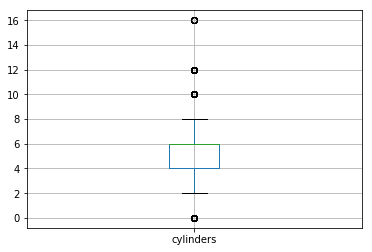

In [106]:
df.boxplot(column='cylinders')

In [109]:
stats=df.describe().T
stats['IQR']=stats['75%']-stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
barrels08,37843.0,17.532506,4.575950,0.06,14.33087,17.347895,20.600625,47.087143,6.269755
barrelsA08,37843.0,0.216169,1.141527,0.00,0.00000,0.000000,0.000000,18.311667,0.000000
charge120,37843.0,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000
charge240,37843.0,0.023531,0.427647,0.00,0.00000,0.000000,0.000000,12.000000,0.000000
city08,37843.0,17.941389,6.660360,6.00,15.00000,17.000000,20.000000,138.000000,5.000000
city08U,37843.0,4.042737,9.645820,0.00,0.00000,0.000000,0.000000,138.304000,0.000000
cityA08,37843.0,0.520149,3.837874,0.00,0.00000,0.000000,0.000000,127.000000,0.000000
cityA08U,37843.0,0.327163,3.542596,0.00,0.00000,0.000000,0.000000,127.093000,0.000000
cityCD,37843.0,0.000406,0.039918,0.00,0.00000,0.000000,0.000000,5.350000,0.000000
cityE,37843.0,0.184790,2.904558,0.00,0.00000,0.000000,0.000000,122.000000,0.000000


In [110]:
outliers=pd.DataFrame(columns=df.columns)

In [113]:
outliers.append(df.iloc[1])
outliers

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,trans_dscr,tCharger,mfrCode,charge240b,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb


In [114]:
for col in stats.index:
    iqr=stats.at[col,'IQR']
    cutoff=iqr*1.6
    lower=stats.at[col,'25%']-cutoff
    upper=stats.at[col,'75%']+cutoff
    results=df[(df[col]<lower)|(df[col]>upper)].copy()
    results['Outlier']=col
    outliers=outliers.append(results)

C:\Users\eldiy\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [115]:
outliers

,Outlier,UCity,UCityA,UHighway,UHighwayA,VClass,barrels08,barrelsA08,charge120,charge240,...,rangeCity,rangeCityA,rangeHwy,rangeHwyA,startStop,tCharger,trans_dscr,trany,year,youSaveSpend
47,barrels08,11.0000,0.0000,15.0000,0.0000,Vans,32.961000,0.000000,0.0,0.00,...,0.0,0.000,0.0,0.000,0,0,0,Automatic 3-spd,1985,-10000
58,barrels08,12.0000,0.0000,15.0000,0.0000,Vans,32.961000,0.000000,0.0,0.00,...,0.0,0.000,0.0,0.000,0,0,0,Automatic 3-spd,1985,-10000
69,barrels08,12.0000,0.0000,15.0000,0.0000,Vans,32.961000,0.000000,0.0,0.00,...,0.0,0.000,0.0,0.000,0,0,0,Automatic 3-spd,1985,-10000
80,barrels08,11.0000,0.0000,14.0000,0.0000,Vans,32.961000,0.000000,0.0,0.00,...,0.0,0.000,0.0,0.000,0,0,0,Automatic 3-spd,1985,-10000
275,barrels08,11.0000,0.0000,16.0000,0.0000,Standard Pickup Trucks,32.961000,0.000000,0.0,0.00,...,0.0,0.000,0.0,0.000,0,0,CLKUP,Automatic 4-spd,1993,-10000
642,barrels08,11.0000,0.0000,15.0000,0.0000,Special Purpose Vehicles,32.961000,0.000000,0.0,0.00,...,0.0,0.000,0.0,0.000,0,0,0,Manual 5-spd,1993,-13500
686,barrels08,12.2222,0.0000,14.0000,0.0000,Special Purpose Vehicles,32.961000,0.000000,0.0,0.00,...,0.0,0.000,0.0,0.000,0,0,2MODE 2LKUP,Automatic 4-spd,1993,-10000
1035,barrels08,10.0000,0.0000,16.0000,0.0000,Special Purpose Vehicle 4WD,32.961000,0.000000,0.0,0.00,...,0.0,0.000,0.0,0.000,0,0,Creeper,Manual 4-spd,1985,-10000
1768,barrels08,11.0000,0.0000,15.0000,0.0000,Special Purpose Vehicle 2WD,32.961000,0.000000,0.0,0.00,...,0.0,0.000,0.0,0.000,0,0,0,Automatic 3-spd,1985,-10000
1770,barrels08,8.8889,0.0000,14.0000,0.0000,Two Seaters,41.201250,0.000000,0.0,0.00,...,0.0,0.000,0.0,0.000,0,0,0,Manual 6-spd,1995,-18500


In [ ]:
df.drop(outliers.index)

In [116]:
from scipy.stats.mstats import winsorize

In [117]:
df2=df.copy()

In [118]:
df2.cylinders=winsorize(df2.cylinders, limits=[0.05,0.95])


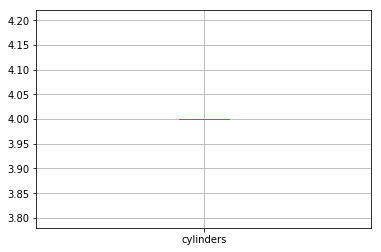

In [120]:
df2.boxplot(column='cylinders')

In [122]:
df.trany.value_counts()

Automatic 4-spd                     11053
Manual 5-spd                         8311
Automatic 3-spd                      3151
Automatic (S6)                       2638
Manual 6-spd                         2429
Automatic 5-spd                      2184
Manual 4-spd                         1483
Automatic 6-spd                      1432
Automatic (S8)                        960
Automatic (S5)                        824
Automatic (variable gear ratios)      681
Automatic 7-spd                       663
Automatic (S7)                        261
Auto(AM-S7)                           256
Automatic 8-spd                       243
Automatic (S4)                        233
Auto(AM7)                             160
Auto(AV-S6)                           145
Auto(AM6)                             110
Automatic (A1)                        109
Auto(AM-S6)                            92
Automatic 9-spd                        90
Manual 3-spd                           77
Manual 7-spd                      

In [123]:
df['trany'] = df['trany'].str.replace('Automatic', 'Auto')
df['trany'] = df['trany'].str.replace('Auto\(', 'Auto ')
df['trany'] = df['trany'].str.replace('Manual\(', 'Manual ')
df['trany'] = df['trany'].str.replace('\(', '')
df['trany'] = df['trany'].str.replace('\)', '')

In [124]:
df.trany.value_counts()

Auto 4-spd                   11053
Manual 5-spd                  8311
Auto 3-spd                    3151
Auto S6                       2638
Manual 6-spd                  2429
Auto 5-spd                    2184
Manual 4-spd                  1483
Auto 6-spd                    1432
Auto S8                        960
Auto S5                        824
Auto variable gear ratios      681
Auto 7-spd                     663
Auto S7                        261
Auto AM-S7                     256
Auto 8-spd                     243
Auto S4                        233
Auto AM7                       160
Auto AV-S6                     155
Auto AM6                       111
Auto A1                        110
Auto AM-S6                      92
Auto 9-spd                      90
Manual 3-spd                    77
Manual 7-spd                    68
Auto AV-S7                      63
Auto AV-S8                      27
Auto S9                         26
Manual 4-spd Doubled            17
Auto AM5            

In [126]:
before=df.shape
df=df.drop_duplicates()
after=df.shape

In [128]:
before[0]-after[0]

0

In [131]:
select_columns = ['make', 'model', 'year', 'displ', 'cylinders', 
                  'trany', 'drive', 'VClass','fuelType','barrels08', 
                  'city08', 'highway08', 'comb08', 'co2TailpipeGpm', 'fuelCost08']

data = df[select_columns].drop_duplicates()
after = len(data)
print('Number of duplicate records dropped: ', str(before[0] - after))

Number of duplicate records dropped:  885


In [132]:
data=pd.read_csv('vehicles.csv')

In [133]:
data.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [135]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

In [138]:
data.columns=['Make', 'Model', 'Year', 'Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle_Class', 'Fuel_Type',
       'Fuel_consumption', 'City_MPG', 'Highway_MPG', 'Combined_MPG',
       'CO2', 'Cost']

In [139]:
data.columns

Index(['Make', 'Model', 'Year', 'Displacement', 'Cylinders', 'Transmission',
       'Drivetrain', 'Vehicle_Class', 'Fuel_Type', 'Fuel_consumption',
       'City_MPG', 'Highway_MPG', 'Combined_MPG', 'CO2', 'Cost'],
      dtype='object')

In [142]:
data=data.rename(columns={'CO2':'Emission_grams'})

In [143]:
data.head()

,Make,Model,Year,Displacement,Cylinders,Transmission,Drivetrain,Vehicle_Class,Fuel_Type,Fuel_consumption,City_MPG,Highway_MPG,Combined_MPG,Emission_grams,Cost
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [159]:
data[['Emission_grams','Cost','Make', 'Model', 'Year', 'Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle_Class', 'Fuel_Type',
       'Fuel_consumption', 'City_MPG', 'Highway_MPG', 'Combined_MPG']]

,Emission_grams,Cost,Make,Model,Year,Displacement,Cylinders,Transmission,Drivetrain,Vehicle_Class,Fuel_Type,Fuel_consumption,City_MPG,Highway_MPG,Combined_MPG
0,522.764706,1950,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17
1,683.615385,2550,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13
2,555.437500,2100,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16
3,683.615385,2550,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13
4,555.437500,2550,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16
5,403.954545,1500,Acura,2.2CL/3.0CL,1997,2.2,4.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,14.982273,20,26,22
6,370.291667,1400,Acura,2.2CL/3.0CL,1997,2.2,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,13.733750,22,28,24
7,444.350000,1650,Acura,2.2CL/3.0CL,1997,3.0,6.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,16.480500,18,26,20
8,403.954545,1500,Acura,2.3CL/3.0CL,1998,2.3,4.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,14.982273,19,27,22
9,370.291667,1400,Acura,2.3CL/3.0CL,1998,2.3,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,13.733750,21,29,24


In [149]:
data[(data.Make=='Ford')&(data.Cylinders>=6)&(data.Combined_MPG<18)]

,Make,Model,Year,Displacement,Cylinders,Transmission,Drivetrain,Vehicle_Class,Fuel_Type,Fuel_consumption,City_MPG,Highway_MPG,Combined_MPG,Emission_grams,Cost
11442,Ford,Aerostar Van,1986,2.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Vans,Regular,19.388824,15,21,17,522.764706,1950
11450,Ford,Aerostar Van,1988,3.0,6.0,Automatic 4-spd,Rear-Wheel Drive,Vans,Regular,19.388824,15,20,17,522.764706,1950
11452,Ford,Aerostar Van,1989,3.0,6.0,Automatic 4-spd,Rear-Wheel Drive,Vans,Regular,19.388824,15,21,17,522.764706,1950
11456,Ford,Aerostar Van,1990,4.0,6.0,Automatic 4-spd,Rear-Wheel Drive,Vans,Regular,19.388824,15,20,17,522.764706,1950
11459,Ford,Aerostar Van,1991,4.0,6.0,Automatic 4-spd,Rear-Wheel Drive,Vans,Regular,19.388824,15,20,17,522.764706,1950
11462,Ford,Aerostar Van,1992,4.0,6.0,Automatic 4-spd,Rear-Wheel Drive,Vans,Regular,20.600625,15,20,16,555.437500,2100
11465,Ford,Aerostar Van,1993,4.0,6.0,Automatic 4-spd,Rear-Wheel Drive,Vans,Regular,19.388824,15,20,17,522.764706,1950
11468,Ford,Aerostar Van,1994,4.0,6.0,Automatic 4-spd,Rear-Wheel Drive,Vans,Regular,20.600625,14,19,16,555.437500,2100
11471,Ford,Aerostar Van,1997,3.0,6.0,Automatic 4-spd,Rear-Wheel Drive,Vans,Regular,19.388824,15,21,17,522.764706,1950
11472,Ford,Aerostar Van AWD,1990,4.0,6.0,Automatic 4-spd,4-Wheel or All-Wheel Drive,Vans,Regular,20.600625,14,18,16,555.437500,2100


In [163]:
data.Combined_MPG.max()

56

In [150]:
mpg_labels=['Very Low','Low','Moderate','High','Very High']

In [151]:
bins=pd.cut(data.Combined_MPG,5,labels=mpg_labels)
bins.head()

0         Low
1    Very Low
2    Very Low
3    Very Low
4    Very Low
Name: Combined_MPG, dtype: category
Categories (5, object): [Very Low < Low < Moderate < High < Very High]

In [152]:
bins.value_counts()

Low          23444
Very Low      9137
Moderate      3052
High           275
Very High       44
Name: Combined_MPG, dtype: int64

In [164]:
bins=pd.qcut(data.Combined_MPG,5,labels=mpg_labels)
bins.head()

0         Low
1    Very Low
2    Very Low
3    Very Low
4    Very Low
Name: Combined_MPG, dtype: category
Categories (5, object): [Very Low < Low < Moderate < High < Very High]

In [165]:
bins.value_counts()

Moderate     9533
Very Low     9137
Low          5979
Very High    5716
High         5587
Name: Combined_MPG, dtype: int64

In [172]:
data['new_bins']=pd.cut(data.Combined_MPG,[7,14,21,28,35,50],labels=mpg_labels)
data[['new_bins','Combined_MPG']]

,new_bins,Combined_MPG
0,Low,17
1,Very Low,13
2,Low,16
3,Very Low,13
4,Low,16
5,Moderate,22
6,Moderate,24
7,Low,20
8,Moderate,22
9,Moderate,24


In [171]:
bins.value_counts()

Low          20068
Moderate      9263
Very Low      4576
High          1663
Very High      366
Name: Combined_MPG, dtype: int64

In [177]:
data.loc[data.Transmission.str.startswith('A'), 'TransType']='A'
data.loc[data.Transmission.str.startswith('M'), 'TransType']='M'

In [179]:
data.TransType.value_counts()

A    24290
M    11662
Name: TransType, dtype: int64

In [181]:
data.Drivetrain.value_counts()

Front-Wheel Drive             13044
Rear-Wheel Drive              12726
4-Wheel or All-Wheel Drive     6503
All-Wheel Drive                2039
4-Wheel Drive                  1058
2-Wheel Drive                   423
Part-time 4-Wheel Drive         158
2-Wheel Drive, Front              1
Name: Drivetrain, dtype: int64

In [183]:
pd.get_dummies(data.Drivetrain, drop_first=True)

,"2-Wheel Drive, Front",4-Wheel Drive,4-Wheel or All-Wheel Drive,All-Wheel Drive,Front-Wheel Drive,Part-time 4-Wheel Drive,Rear-Wheel Drive
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
5,0,0,0,0,1,0,0
6,0,0,0,0,1,0,0
7,0,0,0,0,1,0,0
8,0,0,0,0,1,0,0
9,0,0,0,0,1,0,0


In [190]:
avg_mpg=data.groupby('Make', as_index=False).agg({'Combined_MPG':'mean'})
avg_mpg.columns=['Make','Avg_MPG']

In [194]:
data=pd.merge(data,avg_mpg, on='Make')
data.head()

,Make,Model,Year,Displacement,Cylinders,Transmission,Drivetrain,Vehicle_Class,Fuel_Type,Fuel_consumption,...,Highway_MPG,Combined_MPG,Emission_grams,Cost,new_bins,TransType,Avg_MPG_x,Avg_MPG_y,Avg_MPG_x,Avg_MPG_y
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,...,17,17,522.764706,1950,Low,A,14.75,14.75,14.75,14.75
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,...,13,13,683.615385,2550,Very Low,A,14.75,14.75,14.75,14.75
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,...,17,16,555.437500,2100,Low,A,14.75,14.75,14.75,14.75
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,...,13,13,683.615385,2550,Very Low,A,14.75,14.75,14.75,14.75
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,...,21,16,555.437500,2550,Low,A,16.00,16.00,16.00,16.00


In [195]:
lexus=data[data['Make']=='Lexus']
audi=data[data['Make']=='Audi']

In [196]:
lexus.head()

,Make,Model,Year,Displacement,Cylinders,Transmission,Drivetrain,Vehicle_Class,Fuel_Type,Fuel_consumption,...,Highway_MPG,Combined_MPG,Emission_grams,Cost,new_bins,TransType,Avg_MPG_x,Avg_MPG_y,Avg_MPG_x,Avg_MPG_y
21128,Lexus,CT 200h,2011,1.8,4.0,Automatic (variable gear ratios),Front-Wheel Drive,Compact Cars,Regular,7.847857,...,40,42,211.595238,800,Very High,A,20.982368,20.982368,20.982368,20.982368
21129,Lexus,CT 200h,2012,1.8,4.0,Automatic (variable gear ratios),Front-Wheel Drive,Compact Cars,Regular,7.847857,...,40,42,211.595238,800,Very High,A,20.982368,20.982368,20.982368,20.982368
21130,Lexus,CT 200h,2013,1.8,4.0,Automatic (variable gear ratios),Front-Wheel Drive,Compact Cars,Regular,7.847857,...,40,42,211.000000,800,Very High,A,20.982368,20.982368,20.982368,20.982368
21131,Lexus,CT 200h,2014,1.8,4.0,Automatic (variable gear ratios),Front-Wheel Drive,Compact Cars,Regular,7.847857,...,40,42,179.000000,800,Very High,A,20.982368,20.982368,20.982368,20.982368
21132,Lexus,CT 200h,2015,1.8,4.0,Automatic (variable gear ratios),Front-Wheel Drive,Compact Cars,Regular,7.847857,...,40,42,211.000000,800,Very High,A,20.982368,20.982368,20.982368,20.982368


In [197]:
audi.head()

,Make,Model,Year,Displacement,Cylinders,Transmission,Drivetrain,Vehicle_Class,Fuel_Type,Fuel_consumption,...,Highway_MPG,Combined_MPG,Emission_grams,Cost,new_bins,TransType,Avg_MPG_x,Avg_MPG_y,Avg_MPG_x,Avg_MPG_y
503,Audi,100,1989,2.3,5.0,Automatic 3-spd,Front-Wheel Drive,Midsize Cars,Regular,18.311667,...,20,18,493.722222,1850,Low,A,20.325843,20.325843,20.325843,20.325843
504,Audi,100,1989,2.3,5.0,Manual 5-spd,Front-Wheel Drive,Midsize Cars,Regular,17.347895,...,23,19,467.736842,1750,Low,M,20.325843,20.325843,20.325843,20.325843
505,Audi,100,1990,2.3,5.0,Automatic 3-spd,Front-Wheel Drive,Midsize Cars,Regular,18.311667,...,20,18,493.722222,1850,Low,A,20.325843,20.325843,20.325843,20.325843
506,Audi,100,1990,2.3,5.0,Automatic 4-spd,Front-Wheel Drive,Midsize Cars,Regular,18.311667,...,22,18,493.722222,1850,Low,A,20.325843,20.325843,20.325843,20.325843
507,Audi,100,1991,2.3,5.0,Automatic 4-spd,Front-Wheel Drive,Midsize Cars,Regular,18.311667,...,22,18,493.722222,1850,Low,A,20.325843,20.325843,20.325843,20.325843


In [201]:
pd.concat([lexus,audi],axis=1)

,Make,Model,Year,Displacement,Cylinders,Transmission,Drivetrain,Vehicle_Class,Fuel_Type,Fuel_consumption,...,Highway_MPG,Combined_MPG,Emission_grams,Cost,new_bins,TransType,Avg_MPG_x,Avg_MPG_y,Avg_MPG_x,Avg_MPG_y
503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,18.0,493.722222,1850.0,Low,A,20.325843,20.325843,20.325843,20.325843
504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.0,19.0,467.736842,1750.0,Low,M,20.325843,20.325843,20.325843,20.325843
505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,18.0,493.722222,1850.0,Low,A,20.325843,20.325843,20.325843,20.325843
506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.0,18.0,493.722222,1850.0,Low,A,20.325843,20.325843,20.325843,20.325843
507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.0,18.0,493.722222,1850.0,Low,A,20.325843,20.325843,20.325843,20.325843
508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.0,18.0,493.722222,2250.0,Low,A,20.325843,20.325843,20.325843,20.325843
509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.0,19.0,467.736842,2150.0,Low,A,20.325843,20.325843,20.325843,20.325843
510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.0,19.0,467.736842,2150.0,Low,M,20.325843,20.325843,20.325843,20.325843
511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.0,19.0,467.736842,2150.0,Low,A,20.325843,20.325843,20.325843,20.325843
512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.0,19.0,467.736842,2150.0,Low,M,20.325843,20.325843,20.325843,20.325843


In [203]:
pd.concat([data,pd.get_dummies(data.Drivetrain, drop_first=True)],axis=1)

,Make,Model,Year,Displacement,Cylinders,Transmission,Drivetrain,Vehicle_Class,Fuel_Type,Fuel_consumption,...,Avg_MPG_y,Avg_MPG_x,Avg_MPG_y,"2-Wheel Drive, Front",4-Wheel Drive,4-Wheel or All-Wheel Drive,All-Wheel Drive,Front-Wheel Drive,Part-time 4-Wheel Drive,Rear-Wheel Drive
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,...,14.750000,14.750000,14.750000,0,0,0,0,0,0,0
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,...,14.750000,14.750000,14.750000,0,0,0,0,0,0,0
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,...,14.750000,14.750000,14.750000,0,0,0,0,0,0,1
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,...,14.750000,14.750000,14.750000,0,0,0,0,0,0,1
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,...,16.000000,16.000000,16.000000,0,0,0,0,0,0,1
5,Acura,2.2CL/3.0CL,1997,2.2,4.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,14.982273,...,21.506623,21.506623,21.506623,0,0,0,0,1,0,0
6,Acura,2.2CL/3.0CL,1997,2.2,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,13.733750,...,21.506623,21.506623,21.506623,0,0,0,0,1,0,0
7,Acura,2.2CL/3.0CL,1997,3.0,6.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,16.480500,...,21.506623,21.506623,21.506623,0,0,0,0,1,0,0
8,Acura,2.3CL/3.0CL,1998,2.3,4.0,Automatic 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,14.982273,...,21.506623,21.506623,21.506623,0,0,0,0,1,0,0
9,Acura,2.3CL/3.0CL,1998,2.3,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,13.733750,...,21.506623,21.506623,21.506623,0,0,0,0,1,0,0
